In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import necessary libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\census_income.csv.txt")
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Load  and read the data

## Data Explanation
- There are various columns given in the database where we have to predict whether a person makes over $50K a year.
- Education_num and education are inter-related.So, we can keep only one column(We can keep Education because we can know for what educational status, we are encoding)
- Relationship is not needed for the prediction because there is marrital status
- Race and Native_country is not needed because it is not going to predict how much a person earns

In [3]:
print(data['Workclass'].nunique())
print(data['Education'].nunique())
print(data['Education_num'].nunique())
print(data['Marital_status'].nunique())
print(data['Occupation'].nunique())
print(data['Relationship'].nunique())
print(data['Race'].nunique())
print(data['Sex'].nunique())
print(data['Capital_gain'].nunique())
print(data['Capital_loss'].nunique())
print(data['Hours_per_week'].nunique())
print(data['Native_country'].nunique())
print(data['Income'].nunique())

9
16
16
7
15
6
5
2
119
92
94
42
2


Check for the no. of unique values present for each category

In [4]:
data = data.drop(['Education_num','Relationship','Race','Native_country'], axis = 1)

Dropped these 4 columns since this does not help for the prediction

## Exploratory Data Analysis
### Identifying variables and data types

In [5]:
data.shape

(32560, 11)

The dataframe is having large amount of data

### Checking data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Marital_status  32560 non-null  object
 5   Occupation      32560 non-null  object
 6   Sex             32560 non-null  object
 7   Capital_gain    32560 non-null  int64 
 8   Capital_loss    32560 non-null  int64 
 9   Hours_per_week  32560 non-null  int64 
 10  Income          32560 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.7+ MB


- Various columns like Workclass, Marital_status, Occupation, Sex, Income are having object type
- Other columns are having integer type data

In [7]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week',
       'Income'],
      dtype='object')

There are totally 12 columns now going to take for EDA further

## Missing value treatment

In [8]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Income            0
dtype: int64

- There is no NaN values present. So, there is no need of treating for missing values
- There are '0' s present in many rows which is actually the data in the dataframe. So, we should not treat it

## Visualisation of categorical variable

In [9]:
class_data = data[['Workclass', 'Education', 'Marital_status', 'Occupation', 'Sex', 'Income']]

<function matplotlib.pyplot.show(close=None, block=None)>

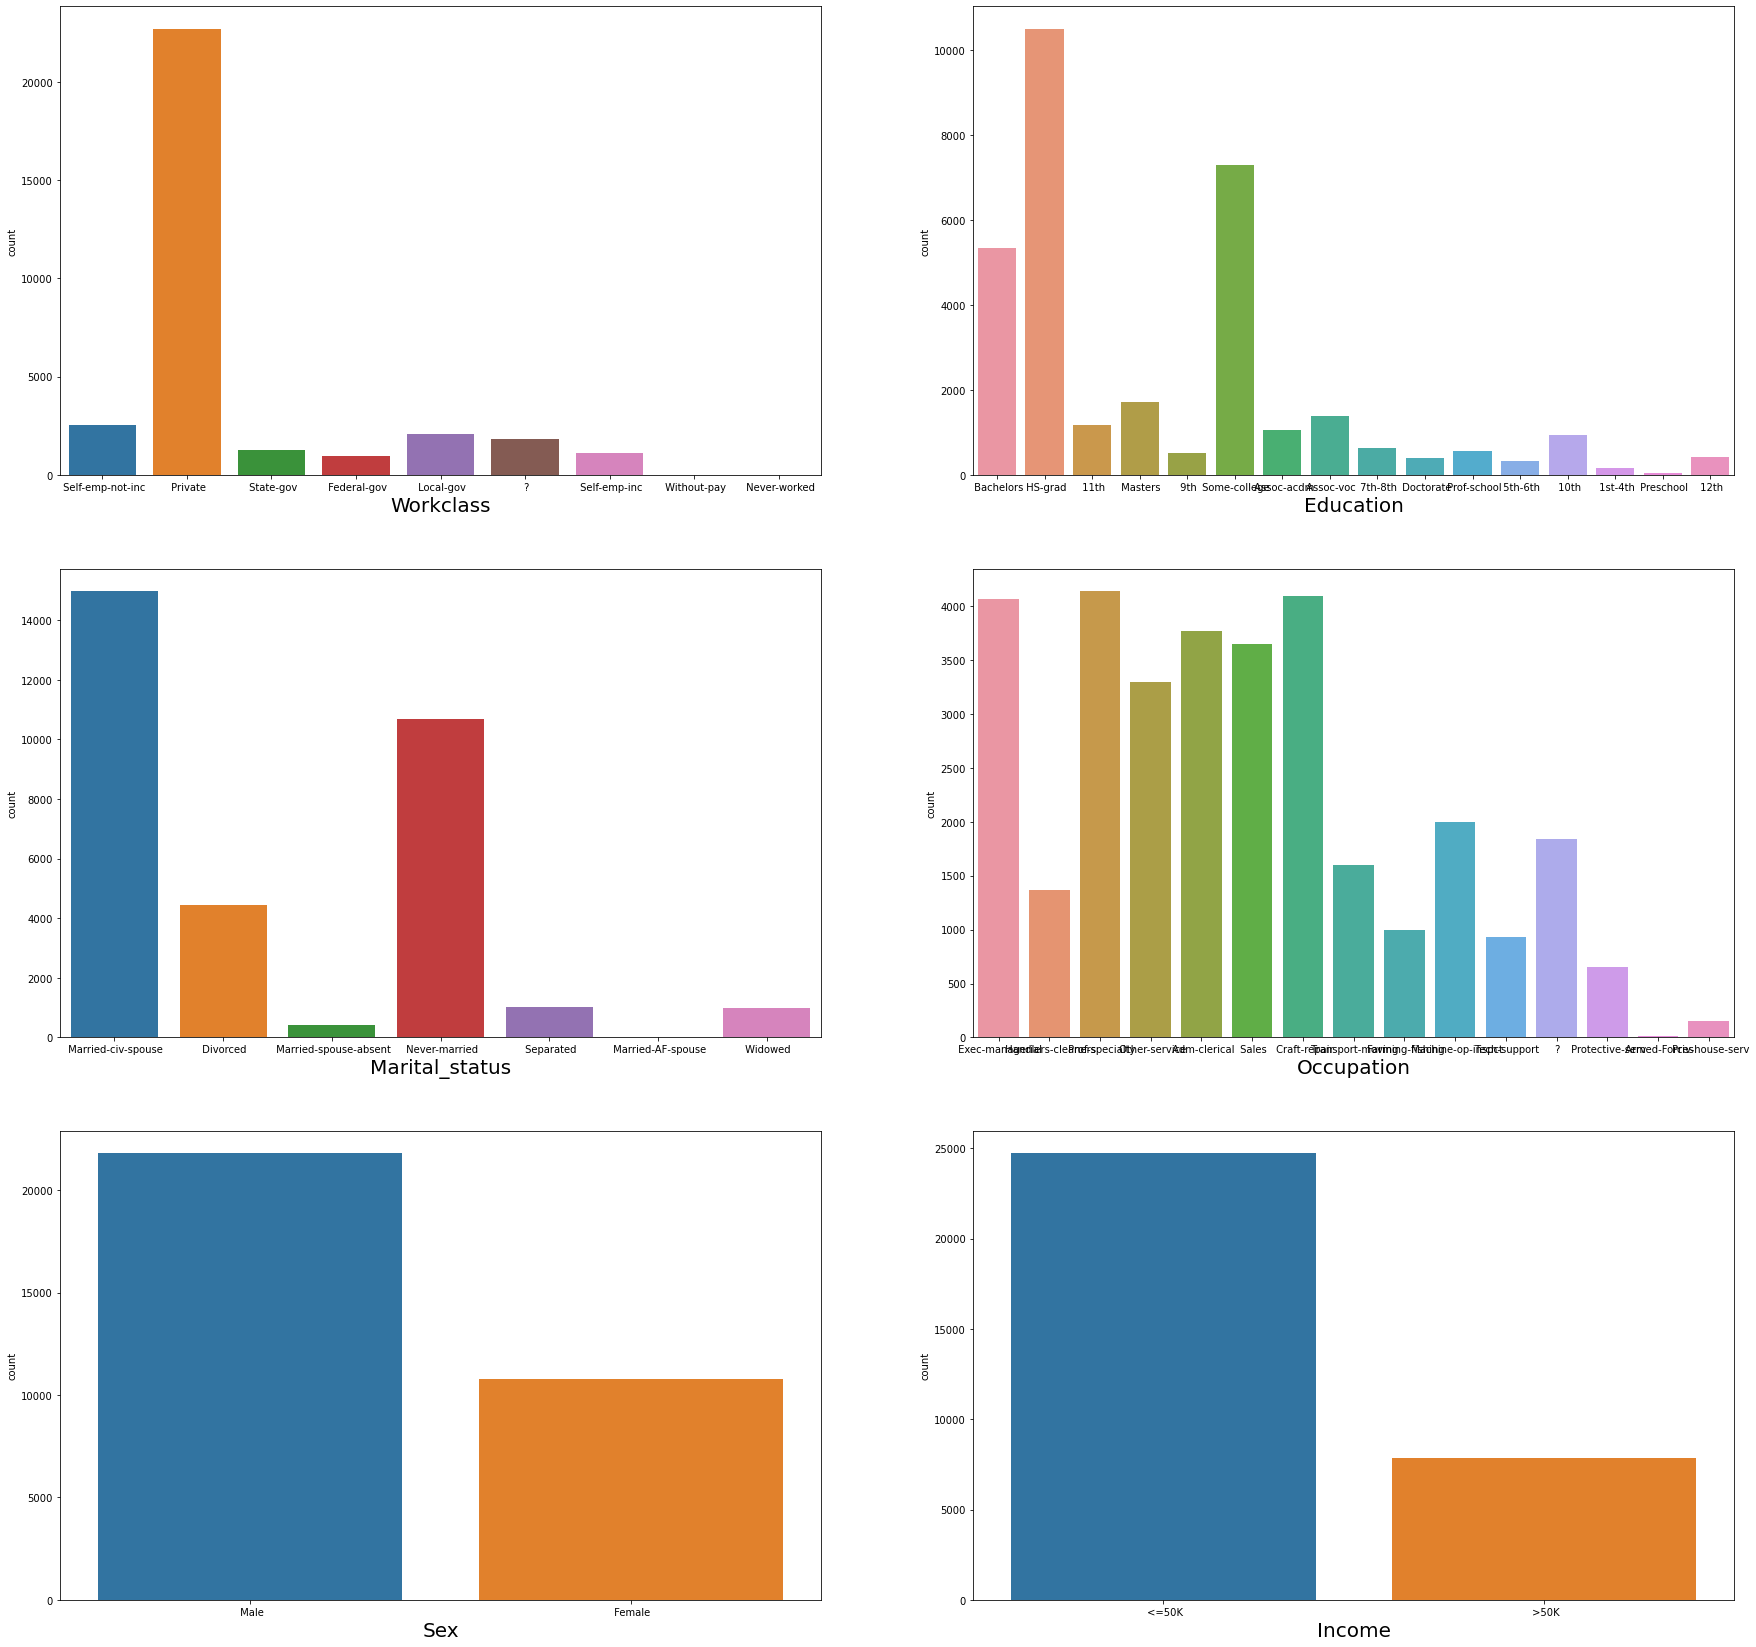

In [10]:
plt.figure(figsize = (30,50), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <=10:
        ax =  plt.subplot(5,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Private job-goers is high compared to other types of employment
- Higher Secondary graduation followed by some college groups have the maximum educational qualification
- Married people followed by never-married is the maximum
- Occupation - Everyone is more or less compared to armed persons and private-house-servants
- Male is 50% percent more compared to females
- Income level is more than 50% more for greater than or equal to 50k

In [11]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Since this is the target which is imbalanced, we have to balance it during training the model

## Visualisation of Continuous variable

In [12]:
continuous_data = data.drop(['Workclass', 'Education', 'Marital_status', 'Occupation', 'Sex', 'Income'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

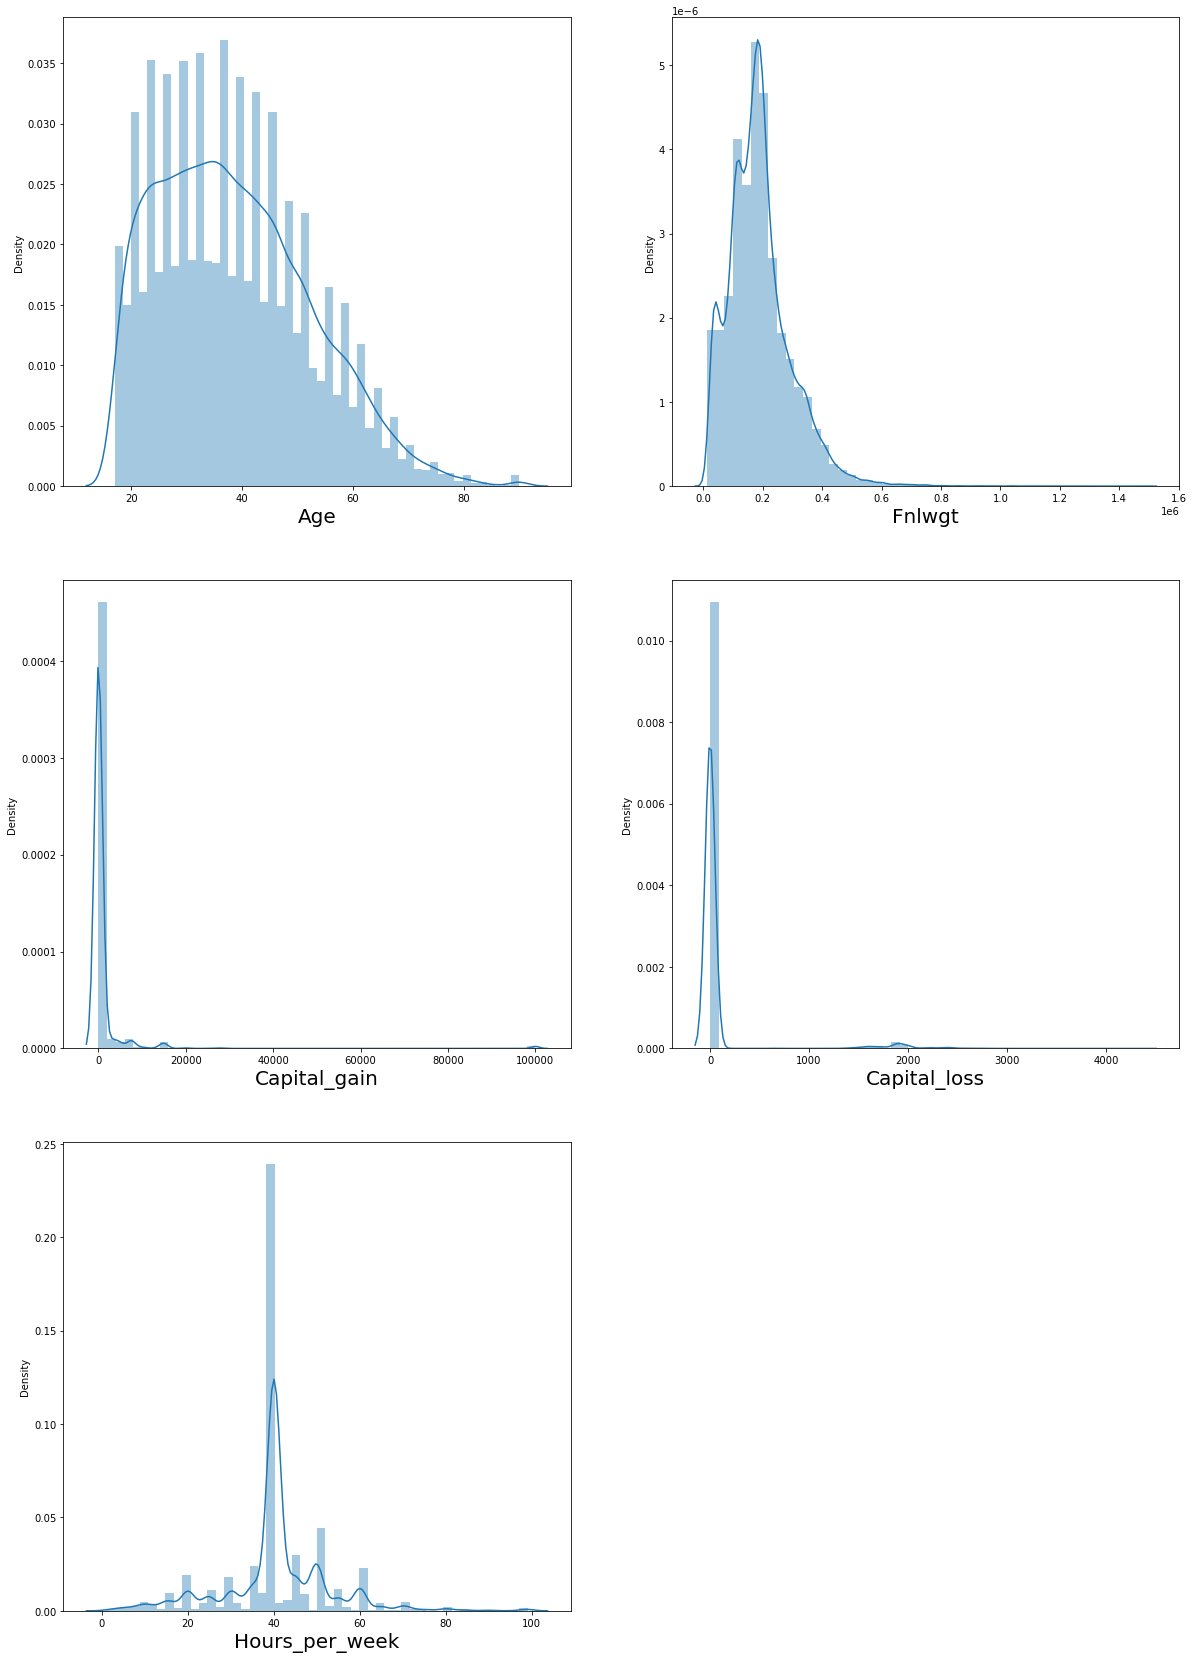

In [13]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=10:
        ax =  plt.subplot(5,2,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Age looks fairly good but has little skewness
- Fnlwgt has little skewness
- Capital_gain and capital_loss is fully skewed
- Hous_per_week looks fairly good but has little skewness

## Encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [15]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))
data

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6.0,83311,9.0,2.0,4.0,1.0,0,0,13,0.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,0,0,40,0.0
2,53,4.0,234721,1.0,2.0,6.0,1.0,0,0,40,0.0
3,28,4.0,338409,9.0,2.0,10.0,0.0,0,0,40,0.0
4,37,4.0,284582,12.0,2.0,4.0,0.0,0,0,40,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,2.0,13.0,0.0,0,0,38,0.0
32556,40,4.0,154374,11.0,2.0,7.0,1.0,0,0,40,1.0
32557,58,4.0,151910,11.0,6.0,1.0,0.0,0,0,40,0.0
32558,22,4.0,201490,11.0,4.0,1.0,1.0,0,0,20,0.0


Thus using ordinal encoder, we encoded the data

In [16]:
print(class_data['Workclass'].value_counts())
print(class_data['Education'].value_counts())
print(class_data['Marital_status'].value_counts())
print(class_data['Occupation'].value_counts())
print(class_data['Sex'].value_counts())
print(class_data['Income'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

The counts of labels in each categorical column

## Describing the data after encoding

In [17]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,2.611794,6.572912,0.669195,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,1.506225,4.228809,0.470510,7385.402999,402.966116,12.347618,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,2.000000,7.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,6.000000,14.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


The data has to be standardised because of capital gain and capital_loss data whcih are too large compared to other column values

## Correlation

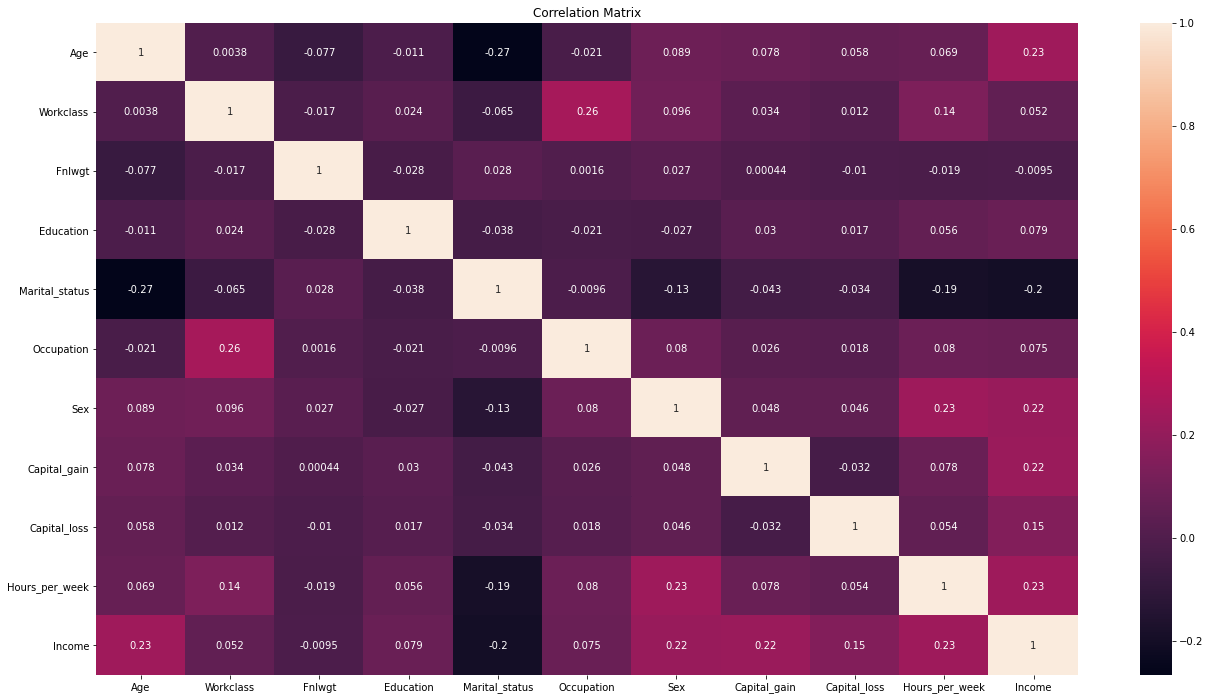

In [18]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

- There is both positively and negatively correlated data
- Age and marital_status and income marital_status are highly negatively correlated

## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

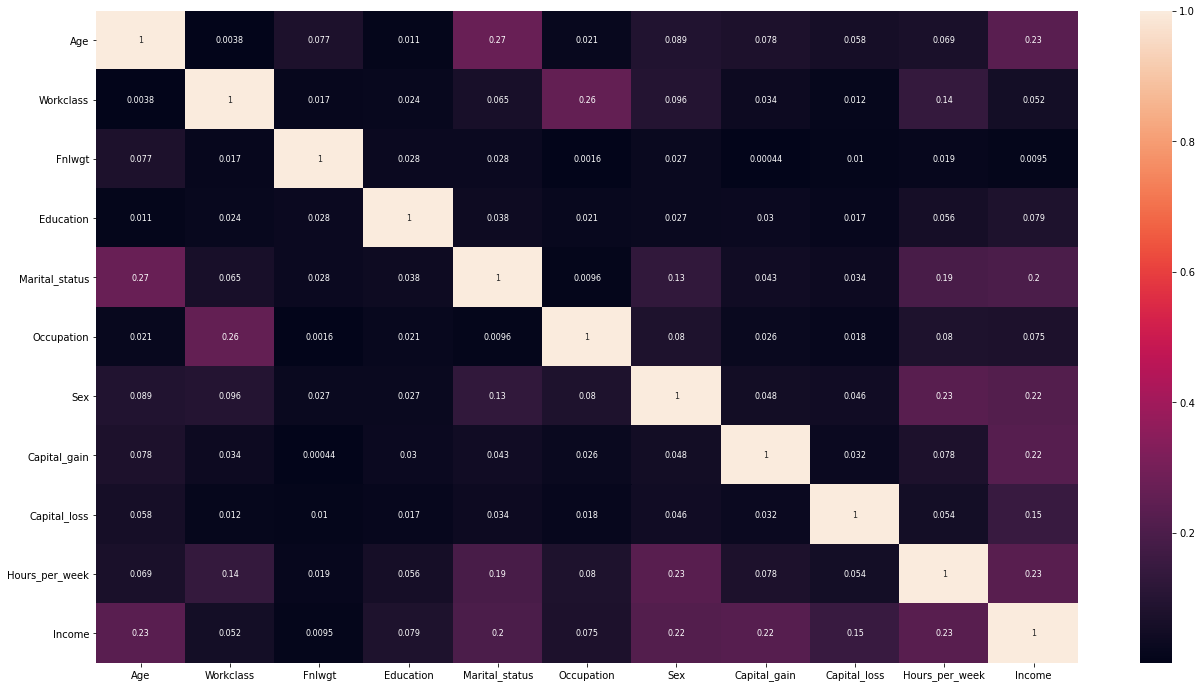

In [19]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,12))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is no collinearity between the variables
## Finding Outliers

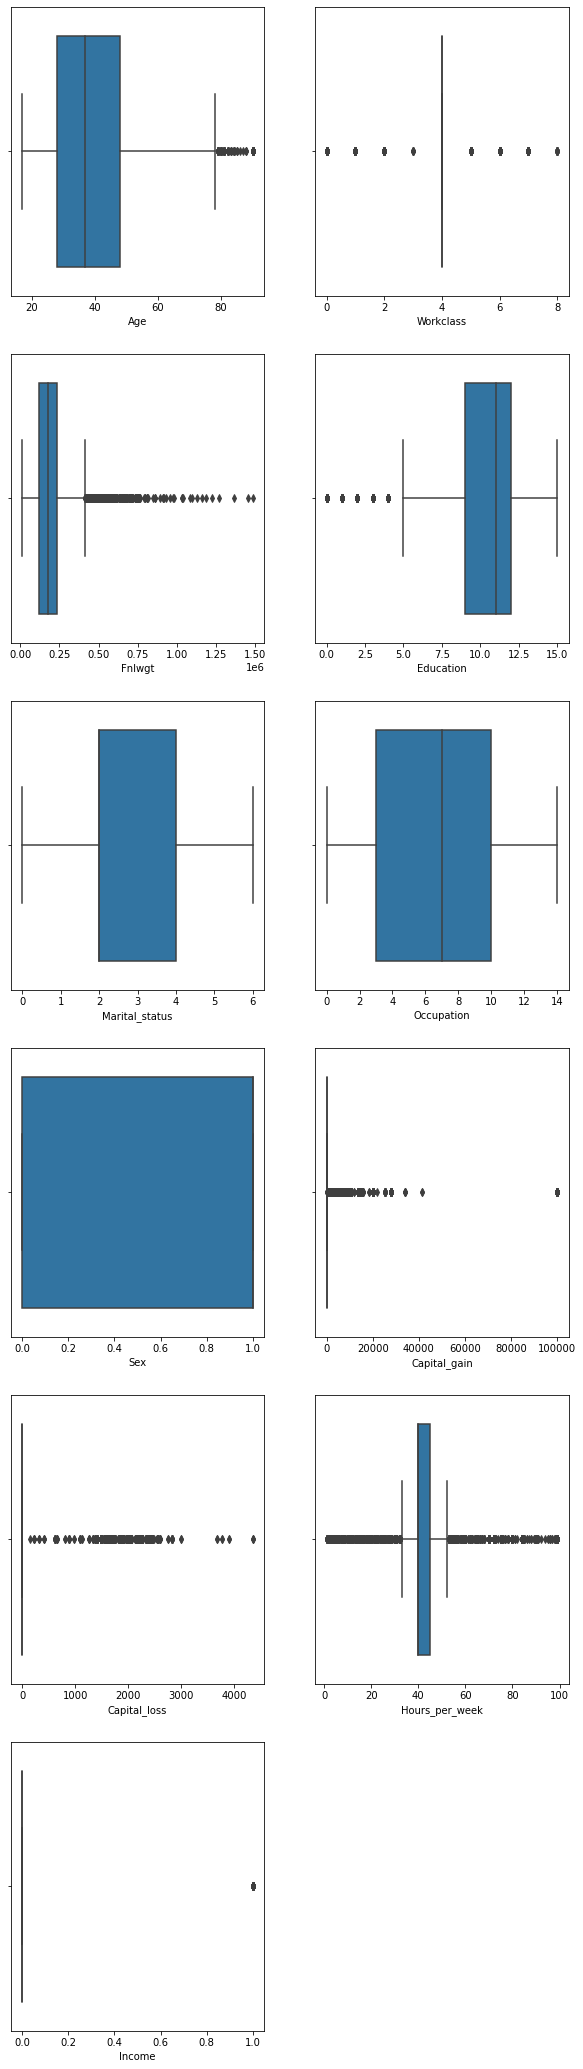

In [20]:
plt.figure(figsize=(10,50))
graph = 1
for column in data:
    if graph<=16:
        ax = plt.subplot(8,2,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

Age, Fnlwgt, Capital_gain,Capital_loss, hours_per_week are having outliers

### Quantifying

In [21]:
from scipy.stats import zscore

## Treating Outliers

In [22]:
z = np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64),
 array([9, 8, 9, ..., 0, 9, 9], dtype=int64))

Threshold is set as 3 which is standard

In [23]:
data = data[(z<3).all(axis=1)]
data

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6.0,83311,9.0,2.0,4.0,1.0,0,0,13,0.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,0,0,40,0.0
2,53,4.0,234721,1.0,2.0,6.0,1.0,0,0,40,0.0
3,28,4.0,338409,9.0,2.0,10.0,0.0,0,0,40,0.0
4,37,4.0,284582,12.0,2.0,4.0,0.0,0,0,40,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,2.0,13.0,0.0,0,0,38,0.0
32556,40,4.0,154374,11.0,2.0,7.0,1.0,0,0,40,1.0
32557,58,4.0,151910,11.0,6.0,1.0,0.0,0,0,40,0.0
32558,22,4.0,201490,11.0,4.0,1.0,1.0,0,0,20,0.0


The zscore having greater than 3 is removed

## % of data loss

In [24]:
Data_loss = ((32560-30028)/32560)*100
Data_loss

7.776412776412776

There is 7% of data loss which is acceptable since there is more data

## Checking Skewness

In [25]:
data.skew()

Age                0.489206
Workclass         -0.747158
Fnlwgt             0.633615
Education         -0.927349
Marital_status    -0.047716
Occupation         0.119988
Sex               -0.681754
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
Income             1.339595
dtype: float64

Check using sort and confirm

In [26]:
data.skew().sort_values()

Education         -0.927349
Workclass         -0.747158
Sex               -0.681754
Hours_per_week    -0.350891
Marital_status    -0.047716
Occupation         0.119988
Age                0.489206
Fnlwgt             0.633615
Income             1.339595
Capital_gain       4.957931
Capital_loss      29.761341
dtype: float64

- There is more skewness in Fnlwgt, Capital_loss and Capital_gain and it should be treated
## Treating skewness

In [27]:
x = data.drop('Income',axis=1)
y = data['Income']

In [28]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x = pd.DataFrame (x_new,columns = x.columns)

In [29]:
x.skew().sort_values(ascending=False)

Capital_loss      24.952898
Capital_gain       3.082525
Hours_per_week     0.108301
Workclass          0.074487
Age               -0.017300
Fnlwgt            -0.034890
Marital_status    -0.126034
Occupation        -0.186048
Education         -0.314155
Sex               -0.681754
dtype: float64

Skewness is treated for Fnlwgt, capital_loss and capital_gain

In [30]:
x.skew()[np.abs(x.skew())<0.25].all()

True

# Model Building
## Finding the relationship between dependent and independent variable

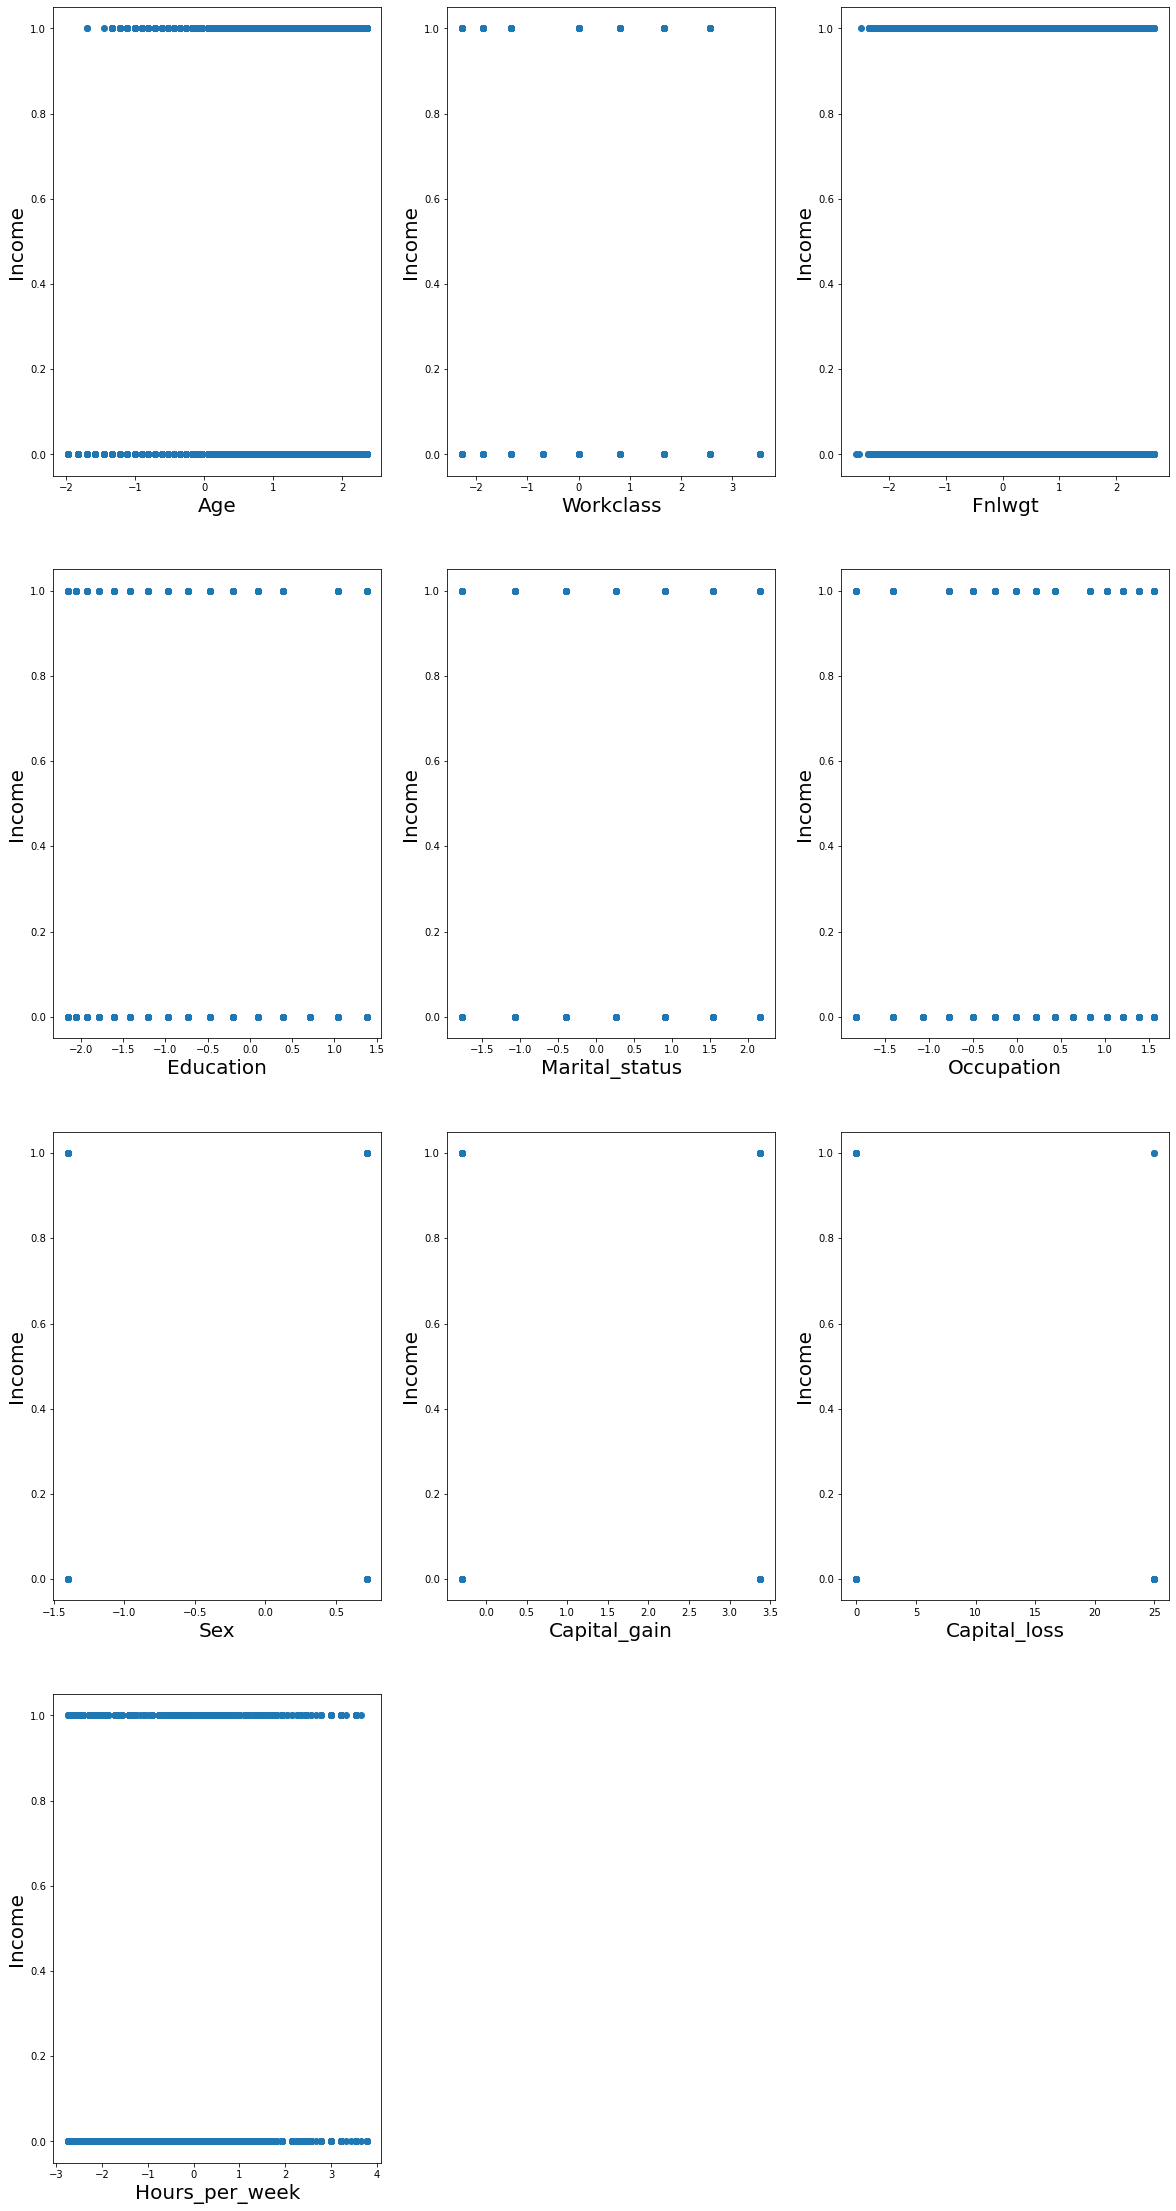

In [31]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Income', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship between target and labels look fairly linear
## Standardisation

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Thus the label data is standardised

## Finding best random state

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [34]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.8070263070263071 on Random State 15


Best accuracy score is 0.80 at random state 15

## Balance the imbalanced dataset

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Since the income values are imbalanced, treat it using SMOTE

In [36]:
print ('Before fit {}'.format (Counter(y_train)))
ove_sam = SMOTE (0.75)
x_train,y_train = ove_sam.fit_resample(x_train,y_train)
print ('After fit {}'.format (Counter(y_train)))

Before fit Counter({0.0: 18689, 1.0: 5333})
After fit Counter({0.0: 18689, 1.0: 14016})


Thus the data is balanced

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 15)

## Logistic Regression

In [38]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 80.7026307026307
[[4488  210]
 [ 949  359]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4698
         1.0       0.63      0.27      0.38      1308

    accuracy                           0.81      6006
   macro avg       0.73      0.61      0.63      6006
weighted avg       0.78      0.81      0.78      6006



## Decision tree classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 81.43523143523143
[[4107  591]
 [ 524  784]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      4698
         1.0       0.57      0.60      0.58      1308

    accuracy                           0.81      6006
   macro avg       0.73      0.74      0.73      6006
weighted avg       0.82      0.81      0.82      6006



## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 86.03063603063603
[[4401  297]
 [ 542  766]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      4698
         1.0       0.72      0.59      0.65      1308

    accuracy                           0.86      6006
   macro avg       0.81      0.76      0.78      6006
weighted avg       0.85      0.86      0.85      6006



## SVC

In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 82.001332001332
[[4509  189]
 [ 892  416]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4698
         1.0       0.69      0.32      0.43      1308

    accuracy                           0.82      6006
   macro avg       0.76      0.64      0.66      6006
weighted avg       0.80      0.82      0.79      6006



Best model with good accuracy selected is Random Forest Classifier with 0.86

## Cross-Validation

In [42]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=10)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=10)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,x,y,cv=10)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,x,y,cv=5)
print('SVC cvs:',sc3.mean())

LR cvs: 0.79552434019456
DT cvs: 0.8060477497186358
RFC cvs: 0.8540697255220906
SVC cvs: 0.8108432228332312


Both the cross-validation score and the model score of random forest classifier shows that the model neither underfits nor overfits.
- Random Forest Classifier - 0.86
- Cross-Validation Score of Random Forest Classifier - 0.85

So, use random forest classifier

## Hyper parameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy'],
             'random_state' : [15]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'random_state': 15}

In [45]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.8541458541458542

Even on tuning the parameters, the score remains the same as 0.85. So, use the Random Forest Classifier model to evaluate.

## ROC AUC Score

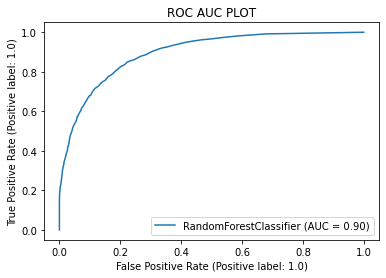

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

## Save the model

In [47]:
import joblib
joblib.dump(rf,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']

Thus the model is saved